In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
data = pd.read_csv('train.csv')

In [6]:
df = pd.DataFrame(data)

In [7]:
# .head() is to show the first five rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
# .tail() is to show the last five
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [10]:
# .info is to show te information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
# .describe(), describes the datasets like its standard deviation, its percentile and so on..
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
# .isnull() is to checkt if there is any null values or not, it gives the bool vaues .isnull() ? True : False
# .isnull().sum() shows how many total null values are present in the columns
# .isnull().sum().sum() show the total number of null values presents in the datasets
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [14]:
# here, .dropn(subset=['SalePrice']) is done becasue the saleprice is the one which is use for the predection ot the house price
df = df.dropna(subset=['SalePrice'])

In [18]:
# this process is to replace the numerical values like (int, float) etc with the mean, median and sometimes mode also..
# this is for replacing the numerical columns
numerical_column = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_column] = df[numerical_column].fillna(df[numerical_column].mean())

In [21]:
# for replace the value with mean mode and others objects i.e is string with the mode
# this process is to fill the null values for the categorical data
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode)

In [23]:
df.isnull().sum().sum()

np.int64(0)

In [24]:
df = df[['SalePrice', 'GrLivArea', 'OverallQual', 'GarageCars', 'YearBuilt']]
df.describe()

,SalePrice,GrLivArea,OverallQual,GarageCars,YearBuilt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,1515.463699,6.099315,1.767123,1971.267808
std,79442.502883,525.480383,1.382997,0.747315,30.202904
min,34900.000000,334.000000,1.000000,0.000000,1872.000000
25%,129975.000000,1129.500000,5.000000,1.000000,1954.000000
50%,163000.000000,1464.000000,6.000000,2.000000,1973.000000
75%,214000.000000,1776.750000,7.000000,2.000000,2000.000000
max,755000.000000,5642.000000,10.000000,4.000000,2010.000000


In [29]:
# correlation matrix of the above datasets
correlation_matrix = df.corr()
print(correlation_matrix)

             SalePrice  GrLivArea  OverallQual  GarageCars  YearBuilt
SalePrice     1.000000   0.708624     0.790982    0.640409   0.522897
GrLivArea     0.708624   1.000000     0.593007    0.467247   0.199010
OverallQual   0.790982   0.593007     1.000000    0.600671   0.572323
GarageCars    0.640409   0.467247     0.600671    1.000000   0.537850
YearBuilt     0.522897   0.199010     0.572323    0.537850   1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

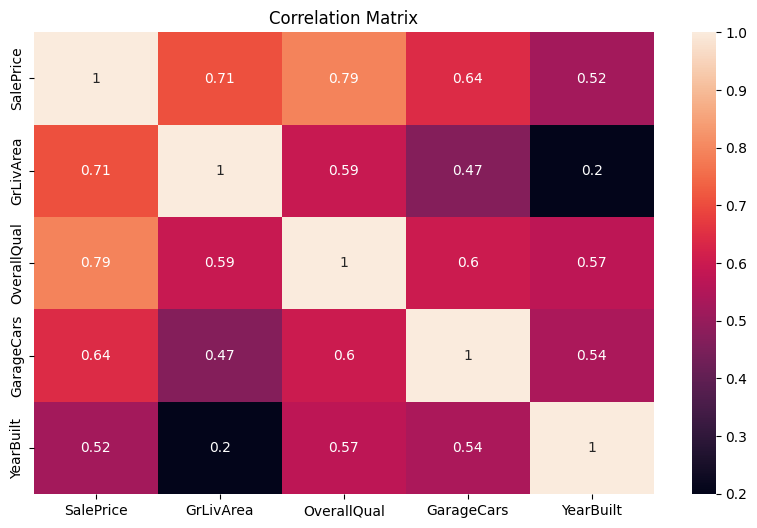

In [30]:
# visulaization of the correlation matrix of the datasets using the seaborn library .
plt.figure(figsize=(10,6))
sns.heatmap(data=correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show

<Figure size 1000x600 with 0 Axes>

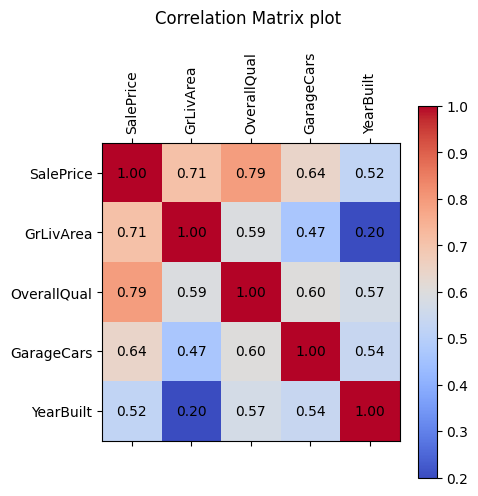

In [31]:
# can also see the visual representation of the correlation matrix using matplotlib library

# -- cmap='coolwarm' sets the color scheme of the plot. 
#    The 'coolwarm' color map shows negative correlations in cool colors (blue) and positive correlations in warm colors (red). ---
plt.figure(figsize=(10, 6))
plt.matshow(correlation_matrix, cmap='coolwarm')

# colorbar to show the color, to represent each color value
plt.colorbar()

# The pad=20 moves the title a bit further from the plot to avoid overlap.
plt.title("Correlation Matrix plot ", pad=20)

# -- range(len(correlation_matrix.columns)) creates a list of numbers from 0 to the number of columns in the correlation matrix.
#    correlation_matrix.columns gives the names of the columns (variables) in the matrix.
#    rotation=90 rotates the labels by 90 degrees, so they are vertical, making them easier to read.--- 
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

# Annotate each cell with the numeric value
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')
        
# to show the plot 
plt.show()

In [32]:
# covariance matrix of the above datasets
covariance_matrix = df.cov()
print(covariance_matrix)

                SalePrice     GrLivArea   OverallQual    GarageCars     YearBuilt
SalePrice    6.311111e+09  2.958187e+07  86904.125837  38020.181359  1.254637e+06
GrLivArea    2.958187e+07  2.761296e+05    430.960770    183.487771  3.158490e+03
OverallQual  8.690413e+04  4.309608e+02      1.912679      0.620814  2.390622e+01
GarageCars   3.802018e+04  1.834878e+02      0.620814      0.558480  1.213986e+01
YearBuilt    1.254637e+06  3.158490e+03     23.906215     12.139859  9.122154e+02


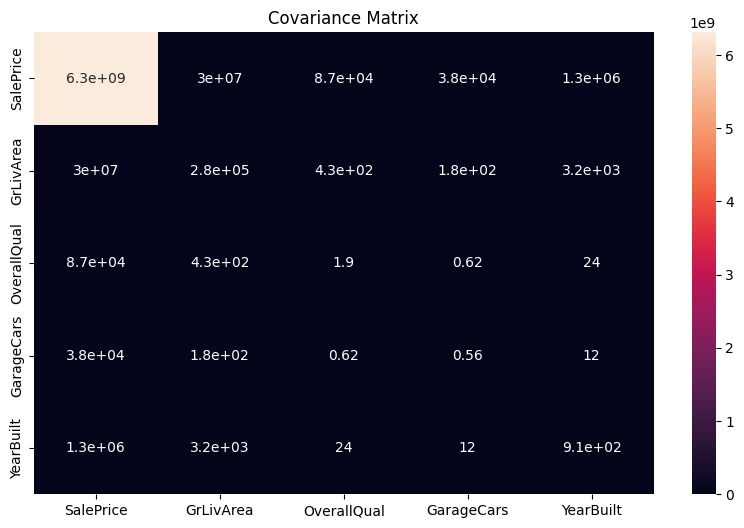

In [33]:
# seaborn library to show the covariance matrix visula representation
plt.figure(figsize=(10,6))
sns.heatmap(data=covariance_matrix, annot=True)
plt.title('Covariance Matrix')
plt.show()

<Figure size 1000x600 with 0 Axes>

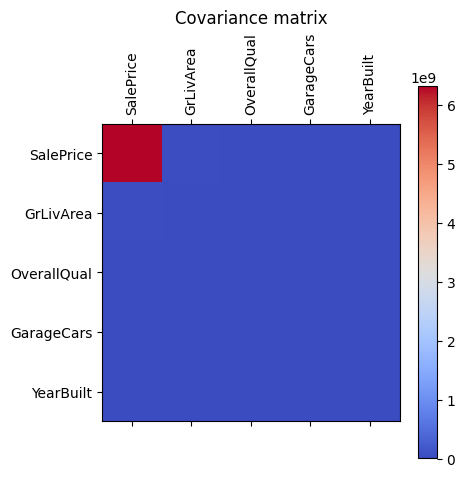

In [34]:
# can also see the visual representation of the covariance matrix using the matplotlib library.
plt.figure(figsize=(10,6))
plt.matshow(covariance_matrix, cmap='coolwarm')
plt.colorbar()
plt.title('Covariance matrix')
plt.xticks(range(len(covariance_matrix.columns)), covariance_matrix.columns, rotation=90)
plt.yticks(range(len(covariance_matrix.columns)), covariance_matrix.columns)
plt.show()

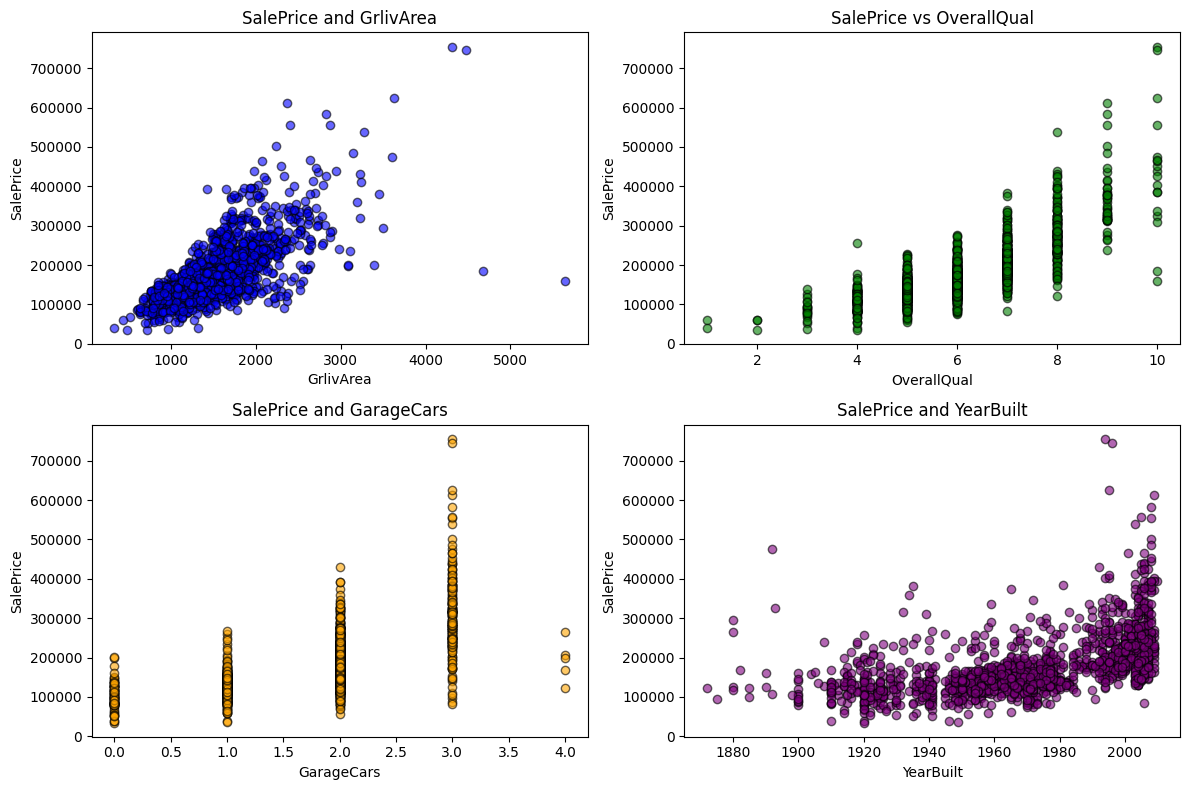

In [41]:
# Scatterplot to visulaize the relationship

plt.figure(figsize=(12,8))

# plot for the SalePrice and GrlivArea
plt.subplot(2, 2, 1)
plt.scatter(df['GrLivArea'], df['SalePrice'], color='blue', alpha=0.6, edgecolor='black')
plt.title('SalePrice and GrlivArea')
plt.xlabel('GrlivArea')
plt.ylabel('SalePrice')

# plot for the SalePrice and OverallQuall
plt.subplot(2, 2, 2)
plt.scatter(df['OverallQual'], df['SalePrice'], color='green', alpha=0.6, edgecolor='black')
plt.title("SalePrice vs OverallQual")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")

# plot for SalePrice and GarageCars
plt.subplot(2, 2, 3)
plt.scatter(df['GarageCars'], df['SalePrice'], color='orange', alpha=0.6, edgecolor='black')
plt.title('SalePrice and GarageCars')
plt.xlabel('GarageCars')
plt.ylabel('SalePrice')

# plot for SalePrice and YearBuilt
plt.subplot(2, 2, 4)
plt.scatter(df['YearBuilt'], df['SalePrice'], color='purple', alpha=0.6, edgecolor='black')
plt.title('SalePrice and YearBuilt')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

In [42]:
# for min max scaler
X = df[['GrLivArea', 'OverallQual', 'GarageCars', 'YearBuilt']]

# initialize the scaler
scaler = MinMaxScaler()

# fit and translform the data
# You use fit_transform on your training data to prepare it for modeling.
X_scaled = scaler.fit_transform(X)

# convert back to the dataframe for clarity
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled_df.head()

,GrLivArea,OverallQual,GarageCars,YearBuilt
0,0.259231,0.666667,0.50,0.949275
1,0.174830,0.555556,0.50,0.753623
2,0.273549,0.666667,0.50,0.934783
3,0.260550,0.666667,0.75,0.311594
4,0.351168,0.777778,0.75,0.927536


In [43]:
# target variable meaning which is used for the predection
y = df['SalePrice']

# now, split the data into training and testing sets
# the meaning of test_size=0.2 is that it is 20 percent
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [44]:
# import the linear regression
# initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# make the predection
y_pred = model.predict(X_test)

# print the predections and the actual value for the comparison
print(f'Predection Value: {y_pred[:5]}')
print(f'Actual Value: {y_test.values[:5]}')

Predection Value: [137994.31219344 294663.74872221 116604.2077803  180713.73564031
 284663.58269038]
Actual Value: [154500 325000 115000 159000 315500]


In [45]:
# for the Error 
# import Mean absoulute error
from sklearn.metrics import mean_absolute_error

# calculate mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 27767.95578300208


In [46]:
# for calulating the mean squared error
from sklearn.metrics import mean_squared_error

# calculate mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1807041969.6278808


In [47]:
# for caluclating the root_mean_squareed_error
# we use mean squared area to calculate the root_mean_squareed_error
rmse = mse ** 0.5
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 42509.316268647286


In [48]:
from sklearn.metrics import r2_score

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.7644113273911772
